In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_parquet("df_total.parquet")
dados.head()

,arquivo,classe,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,16679_1.jpg,1,170.0,174.0,177.0,172.0,167.0,161.0,156.0,161.0,...,176.0,188.0,168.0,96.0,67.0,77.0,136.0,166.0,175.0,171.0
1,04354.jpg,1,183.0,186.0,191.0,187.0,178.0,179.0,182.0,181.0,...,186.0,183.0,181.0,182.0,183.0,184.0,184.0,185.0,182.0,181.0
2,02725.jpg,1,158.0,158.0,160.0,149.0,149.0,157.0,155.0,150.0,...,185.0,184.0,194.0,190.0,192.0,182.0,181.0,179.0,198.0,190.0
3,11369_1.jpg,1,187.0,187.0,190.0,192.0,196.0,195.0,201.0,216.0,...,193.0,188.0,194.0,196.0,187.0,191.0,190.0,190.0,188.0,190.0
4,19463.jpg,1,176.0,174.0,174.0,162.0,71.0,166.0,206.0,170.0,...,183.0,182.0,176.0,171.0,184.0,176.0,179.0,185.0,174.0,190.0


In [3]:
dados.sample(frac=1).head()

,arquivo,classe,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
5623,15379_1.jpg,1,186.0,181.0,186.0,190.0,189.0,189.0,190.0,172.0,...,190.0,190.0,190.0,192.0,191.0,194.0,196.0,198.0,196.0,196.0
1483,07306.jpg,1,183.0,183.0,181.0,177.0,178.0,176.0,182.0,184.0,...,181.0,184.0,179.0,181.0,181.0,182.0,176.0,176.0,172.0,176.0
13987,04663.jpg,1,202.0,201.0,202.0,202.0,197.0,198.0,185.0,194.0,...,186.0,187.0,181.0,184.0,180.0,177.0,181.0,188.0,186.0,186.0
10636,14461_1.jpg,1,202.0,208.0,205.0,203.0,203.0,198.0,204.0,203.0,...,192.0,187.0,196.0,192.0,197.0,196.0,197.0,202.0,203.0,203.0
5378,04069.jpg,1,158.0,159.0,160.0,159.0,152.0,152.0,153.0,147.0,...,150.0,150.0,148.0,148.0,152.0,154.0,155.0,149.0,148.0,155.0


In [4]:
X = dados.drop(['arquivo', 'classe'], axis=1)
y = dados['classe']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=12)

In [5]:
X_train.shape

(28000, 1024)

In [6]:
X_test.shape

(12000, 1024)

In [7]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [8]:
media_treino = X_train.mean(axis=0)
X_train_center = X_train - media_treino

In [9]:
media_teste = X_test.mean(axis=0)
X_teste_center = media_treino - media_teste

In [10]:
cov_treino = np.cov(X_train, rowvar=False)

In [11]:
autovalores_cov_treino, autovetores_cov_treino = np.linalg.eigh(cov_treino)

In [12]:
autovalores_cov_treino

array([3.09989651e+00, 3.35688301e+00, 3.51271079e+00, ...,
       3.56232333e+04, 5.25382714e+04, 5.41401981e+05])

Os autovalores já vem em ordem crescente, então basta inverter os arrays.

In [16]:
autovalores_cov_treino = autovalores_cov_treino[::1]
autovetores_cov_treino = autovetores_cov_treino[::1]

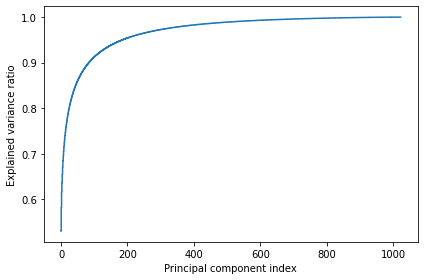

In [21]:
soma_autovalores = sum(autovalores_cov_treino)
var_exp = [(i/soma_autovalores) for i in autovalores_cov_treino]
cum_sum_exp = np.cumsum(var_exp)

plt.step(range(0, len(cum_sum_exp)), cum_sum_exp, where='mid')
plt.ylabel('Variabilidade Acumulada')
plt.xlabel('Principal component index (r)')
plt.tight_layout()
plt.show()

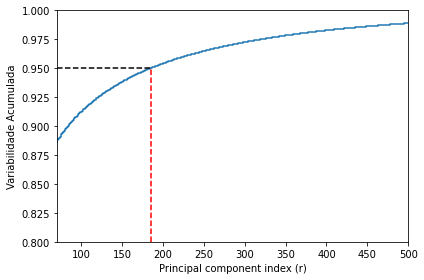

In [58]:
plt.step(range(0, len(cum_sum_exp)), cum_sum_exp, where='mid')
plt.ylabel('Variabilidade Acumulada')
plt.xlabel('Principal component index (r)')
plt.axis([70, 500, 0.8, 1.0])

r = 185

plt.vlines(x=r, ymin=0.8, ymax=cum_sum_exp[r], colors='r',linestyles='dashed')
plt.hlines(y=cum_sum_exp[r], xmin=70, xmax=r, colors='k',linestyles='dashed')

plt.tight_layout()
plt.show()

In [59]:
round(cum_sum_exp[r], 2)

0.95

In [60]:
r = 185

In [65]:
autovetores_cov_treino.shape

(1024, 1024)

In [78]:
Q_r = autovetores_cov_treino[:, :r]

In [80]:
Z_train = np.matmul(X_train, Q_r)

In [81]:
Z_test = np.matmul(X_test, Q_r)

In [83]:
Z_train.shape

(28000, 185)

In [85]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Z_train, y_train)
y_pred = model.predict(Z_test)
print(y_pred)

[0 0 1 ... 1 0 1]


In [87]:
accuracy_score(y_test, y_pred)

0.9425833333333333

In [100]:
accuracy = []

for r in range(1024):
    Q_r = autovetores_cov_treino[:, :r+1]
    Z_train = np.matmul(X_train, Q_r)
    Z_test = np.matmul(X_test, Q_r)
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(Z_train, y_train)
    y_pred = model.predict(Z_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(r+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


KeyboardInterrupt: 

In [95]:
accuracy

[0.6428333333333334,
 0.8271666666666667,
 0.8896666666666667,
 0.9121666666666667,
 0.9258333333333333]